In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Charger les données
data = pd.read_csv('web_attack_logs.csv')

# Traiter les adresses IP en les divisant en segments
def process_ip(ip):
    segments = ip.split('.')
    return [int(seg) for seg in segments]

# Créer des colonnes pour chaque segment d'adresse IP
data[['ip_seg1', 'ip_seg2', 'ip_seg3', 'ip_seg4']] = data['ip_address'].apply(process_ip).to_list()

# Supprimer les colonnes inutiles
X = data.drop(columns=['is_attack', 'ip_address'])

# Convertir les colonnes catégoriques en variables numériques
X = pd.get_dummies(X, columns=['user_agent', 'url', 'http_method', 'query_parameters'])

# Variable cible
y = data['is_attack']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00        44

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [13]:
print(data['is_attack'].value_counts())


is_attack
0    807
1    193
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Validation croisée - Accuracy :", scores.mean())


Validation croisée - Accuracy : 1.0


In [15]:
feature_importances = model.feature_importances_
for name, importance in zip(X.columns, feature_importances):
    print(f"{name}: {importance}")


response_status: 0.18101644488334562
sql_keywords_detected: 0.2236647195002009
anomalous_patterns: 0.281715095499187
ip_seg1: 0.01449878342622406
ip_seg2: 0.013598926915870618
ip_seg3: 0.016146066676379925
ip_seg4: 0.01350558515823832
user_agent_Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36: 0.0013919666480739967
user_agent_Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36: 0.0016682368280392843
user_agent_curl/7.68.0: 0.001429687359558941
user_agent_python-requests/2.25.1: 0.0020474473897352727
url_/contact: 0.0017290111667971214
url_/home: 0.0014449540259948582
url_/login: 0.0017419179633964593
url_/products: 0.0016114138315822838
url_/search: 0.0015147860101005128
http_method_GET: 0.0014015059974276686
http_method_POST: 0.0022396103865589727
query_parameters_' AND sleep(5)--: 0.023557898177765654
query_parameters_' OR 'a'='a: 0.040395239127119

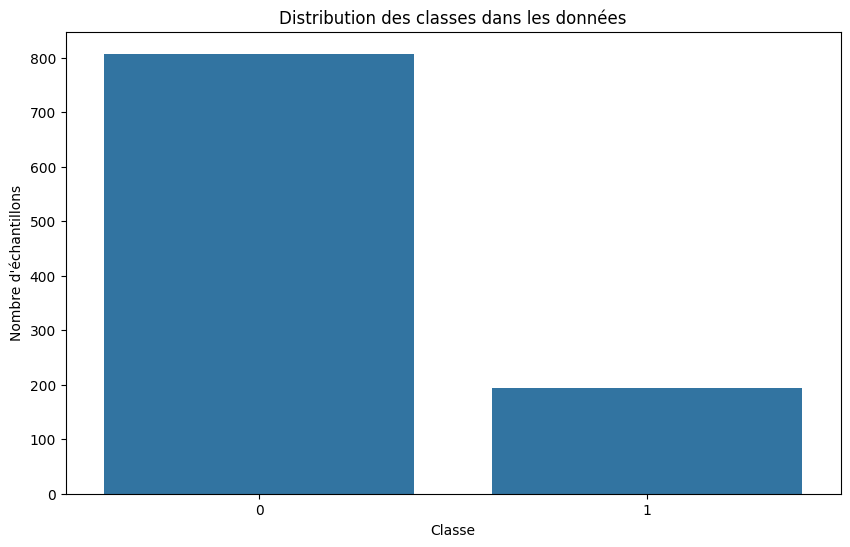

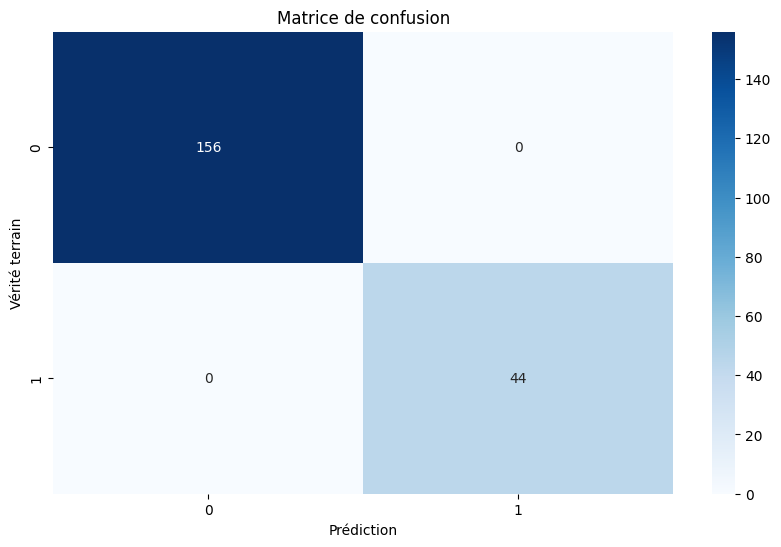

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt

# Distribution des classes dans les données
plt.figure(figsize=(10, 6))
sns.countplot(x='is_attack', data=data)
plt.title('Distribution des classes dans les données')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')
plt.show()

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.show()

# Importance des caractéristiques
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

In [21]:
import pandas as pd

# Supposons que 'model' soit votre modèle entraîné et 'X_train' soit votre ensemble de données d'entraînement
feature_importances = model.feature_importances_
features = X_train.columns

# Créer un DataFrame pour les importances des caractéristiques
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Trier les caractéristiques par importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher le tableau d'importance des caractéristiques
importance_df

,Feature,Importance
2,anomalous_patterns,0.281715
1,sql_keywords_detected,0.223665
0,response_status,0.181016
22,query_parameters_'; EXEC xp_cmdshell('whoami')--,0.060072
20,query_parameters_' OR 1=1--,0.043268
...,...,...
525,query_parameters_id=92,0.000000
530,query_parameters_id=926,0.000000
526,query_parameters_id=920,0.000000
538,query_parameters_id=947,0.000000


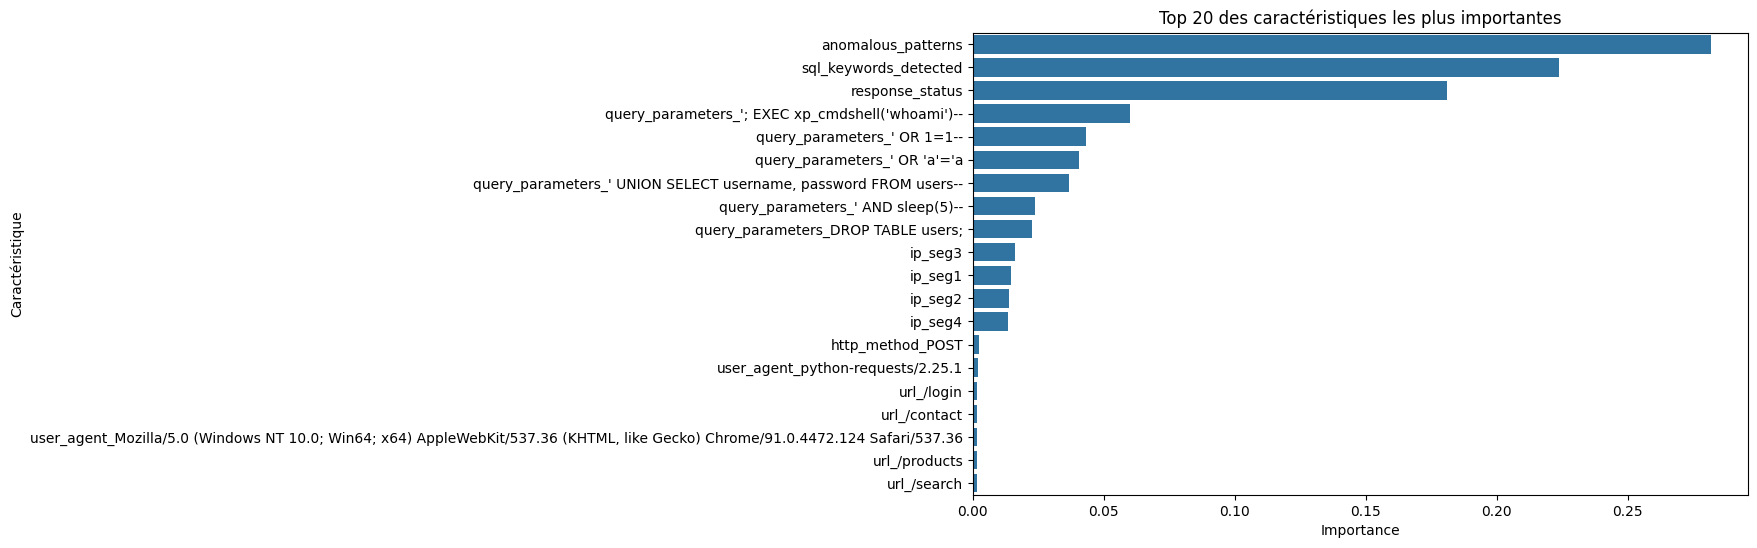

In [23]:
# Sélectionner les 20 caractéristiques les plus importantes
top_20_importance_df = importance_df.head(20)

# Afficher le tableau d'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_20_importance_df)
plt.title('Top 20 des caractéristiques les plus importantes')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.show()

In [26]:
import joblib

# Sauvegarder le modèle dans un fichier
joblib.dump(model, 'forensic.pkl')

['forensic.pkl']